In [1]:
import os
#!pip install pyulog
from pyulog import ULog
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to load ULog files and explore sensors
def explore_ulog_files(directory):
    """
    Explore ULog files in a directory to count sensor occurrences and entries.

    :param directory: Path to directory containing ULog files.
    :return: Sensor occurrence statistics as a DataFrame.
    """
    sensor_counts = Counter()
    sensor_entries = Counter()
    total_files = 0

    for file in os.listdir(directory):
        if file.endswith(".ulg"):
            total_files += 1
            file_path = os.path.join(directory, file)
            ulog = ULog(file_path)
            
            # List all dataset names
            for dataset in ulog.data_list:
                sensor_name = dataset.name
                sensor_counts[sensor_name] += 1
                sensor_entries[sensor_name] += len(dataset.data['timestamp'])

    # Convert counts into a DataFrame for analysis
    sensor_stats = pd.DataFrame({
        "Sensor": list(sensor_counts.keys()),
        "Occurrences": list(sensor_counts.values()),
        "Entries": list(sensor_entries.values())
    }).sort_values(by="Occurrences", ascending=False)
    
    return sensor_stats, total_files

# Analyze ULog files in a directory
directory_path = "C:/Users/mayur/Documents/pyulog/test"  
sensor_stats, total_files = explore_ulog_files(directory_path)

# Display results
print(f"Total ULog files analyzed: {total_files}")
print(sensor_stats)

Total ULog files analyzed: 6
                                 Sensor  Occurrences  Entries
9                      telemetry_status           11      250
6                      estimator_status            8     4093
1                      actuator_outputs            8     3184
47                          sensor_gyro            7       82
61                   vehicle_imu_status            7       83
..                                  ...          ...      ...
65                  actuator_controls_1            1     1812
62   vehicle_local_position_groundtruth            1      540
31            estimator_selector_status            1       11
58  vehicle_global_position_groundtruth            1      109
93              vehicle_torque_setpoint            1     1558

[94 rows x 3 columns]


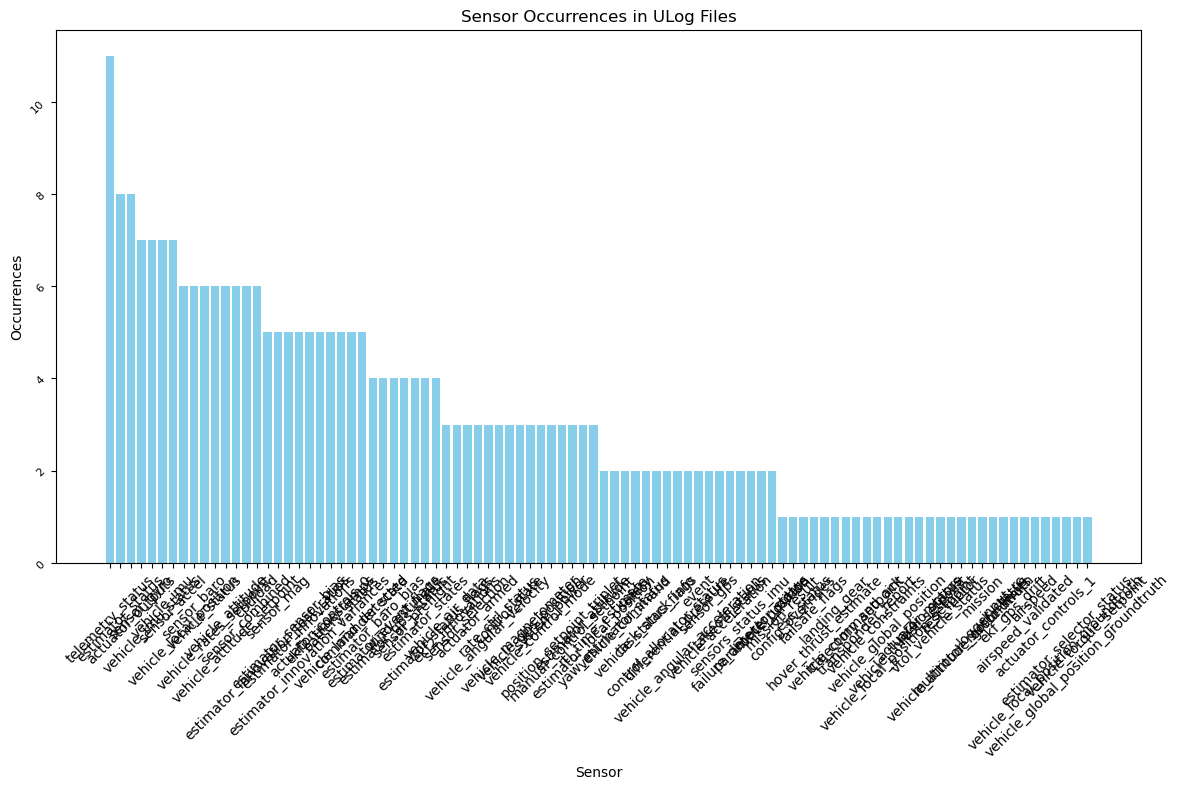

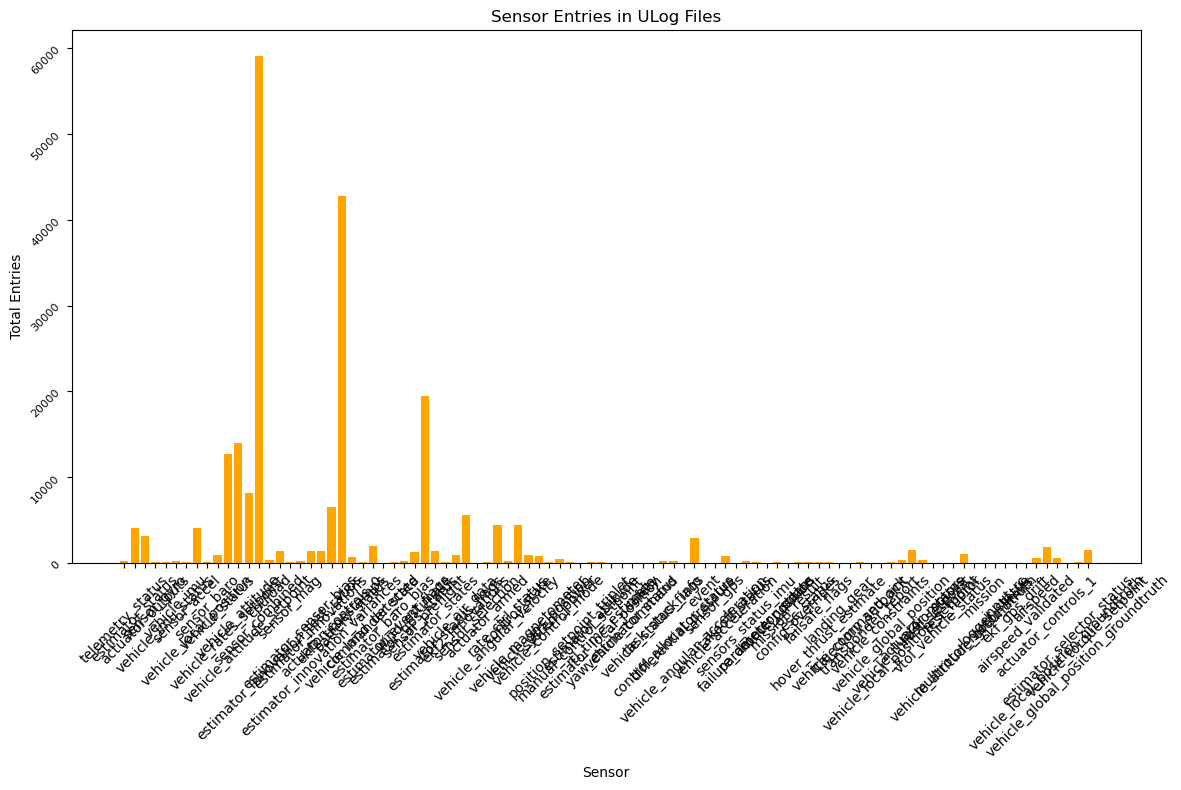

C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayur\anaconda3\Lib\site-packages\sklea

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2011
           1       0.83      0.97      0.89       959
           2       0.91      0.65      0.76       556
           3       1.00      1.00      1.00      1294
           4       1.00      0.99      0.99        91
           5       1.00      1.00      1.00      1715
           6       1.00      1.00      1.00      1207
           7       1.00      1.00      1.00     17682
           8       1.00      1.00      1.00      5883
           9       0.99      1.00      0.99        67
          10       1.00      1.00      1.00      4279
          11       1.00      1.00      1.00      2349
          12       1.00      1.00      1.00      1224
          13       1.00      1.00      1.00      3786
          14       0.99      0.47      0.64       238
          15       0.90      0.98      0.94       182
          16       1.00      1.00      1.00     12959
          17       1.00    

NameError: name 'y_test' is not defined

In [2]:
# Preprocessing for Sensor Data
def preprocess_sensor_data(sensor_stats, ulog_directory):
    """
    Preprocess data from the identified sensors for analysis or machine learning.

    :param sensor_stats: DataFrame containing sensor statistics.
    :param ulog_directory: Path to directory containing ULog files.
    :return: Preprocessed data as a pandas DataFrame.
    """
    combined_data = []
    
    for file in os.listdir(ulog_directory):
        if file.endswith(".ulg"):
            ulog = ULog(os.path.join(ulog_directory, file))
            
            for dataset in ulog.data_list:
                if dataset.name in sensor_stats["Sensor"].values:
                    # Extract relevant fields and timestamps
                    data = pd.DataFrame(dataset.data)
                    data["sensor_name"] = dataset.name
                    combined_data.append(data)
    
    # Combine all data into a single DataFrame
    full_data = pd.concat(combined_data, ignore_index=True)

    # Handle missing values
    full_data.ffill(inplace=True)  # Forward fill
    full_data.bfill(inplace=True)  # Backward fill

    # Normalize numerical columns
    numerical_cols = full_data.select_dtypes(include=[np.number]).columns
    full_data[numerical_cols] = (full_data[numerical_cols] - full_data[numerical_cols].mean()) / full_data[numerical_cols].std()

    return full_data

# Exploring and Visualizing Sensor Data

def visualize_sensor_statistics(sensor_stats):
    """
    Visualize sensor occurrences and entries.

    :param sensor_stats: DataFrame containing sensor statistics.
    """
    # Plot occurrences
    plt.figure(figsize=(12, 8))
    plt.bar(sensor_stats["Sensor"], sensor_stats["Occurrences"], color='skyblue')
    plt.title("Sensor Occurrences in ULog Files")
    plt.xlabel("Sensor")
    plt.ylabel("Occurrences")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

    # Plot entries
    plt.figure(figsize=(12, 8))
    plt.bar(sensor_stats["Sensor"], sensor_stats["Entries"], color='orange')
    plt.title("Sensor Entries in ULog Files")
    plt.xlabel("Sensor")
    plt.ylabel("Total Entries")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

# Visualize the results
visualize_sensor_statistics(sensor_stats)

# ML Exploration
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def train_ml_model(data):
    """
    Train a basic machine learning model using preprocessed sensor data.

    :param data: Preprocessed sensor data as a pandas DataFrame.
    """
    # Prepare features and labels
    X = data.drop(columns=["sensor_name", "timestamp"])
    y = data["sensor_name"]  # Use sensor_name as a target for a classification example

    # Encode target variable
    y = pd.factorize(y)[0]

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    #from imblearn.over_sampling import SMOTE
    #smote = SMOTE()
    #X_resampled, y_resampled = smote.fit_resample(X, y)

    # Evaluate the model
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Train the model
preprocessed_data = preprocess_sensor_data(sensor_stats, directory_path)
train_ml_model(preprocessed_data)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
#print("Classification Report:")
#print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()